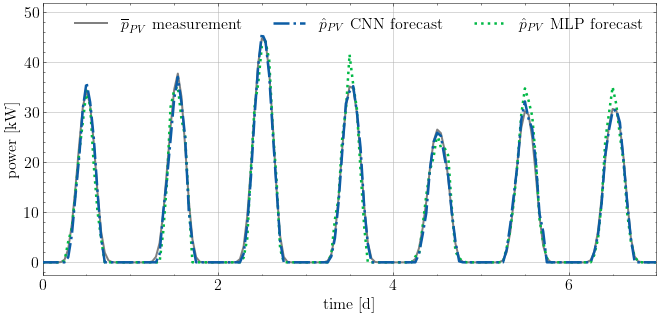

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import sys
sys.path.insert(0,'../..')
from mtfunc.helper import *
plt.style.use('science')
plt.rcParams.update({'font.size': 16})
mpl.rcParams['lines.linewidth'] = 2    
mpl.rcParams['figure.figsize'] = (11, 5)
mpl.rcParams['axes.grid'] = True
day=24

# data=get_data('data_dense_conv_2022_03_10_0214.csv',npy=False)
data=get_data('s1data_dense_conv_2022_03_10_0321.csv',npy=False)
di=45*day
T=15*day
df=di+T
data=data[di:df].reset_index()


plt.plot(data.index.values/24,data.power_pv,label='$\overline{p}_{PV}$ measurement',color='gray',linewidth=2)
plt.plot(data.index.values/24,data.PV_fc_conv,'-.',label='$\hat{p}_{PV}$ CNN forecast',linewidth=2.5,zorder=4)
plt.plot(data.index.values/24,data.PV_fc_dense,':',label='$\hat{p}_{PV}$ MLP forecast',linewidth=2.5)

plt.ylabel(r'power [kW]')
# plt.ylim([0,2])
plt.xlabel(r'time [d]')

# plt.ylim([0,70])
plt.legend(markerscale=8,ncol=3)
# plt.yticks(np.arange(60,91,10))
plt.xticks(np.arange(0,T//day+1,2))
plt.xlim([0,7])
plt.savefig('PP_PV_dense_conv.pdf')

In [10]:
data

,index,power_pv,PV_fc_conv,PV_fc_dense
0,480,-0.019796,0.0,0.0
1,481,-0.019436,0.0,0.0
2,482,-0.018817,0.0,0.0
3,483,-0.018338,0.0,0.0
4,484,-0.018499,0.0,0.0
...,...,...,...,...
355,835,0.016652,0.0,0.0
356,836,0.012298,0.0,0.0
357,837,0.008945,0.0,0.0
358,838,0.003807,0.0,0.0


# Error plots

In [11]:
data['err_dense']=data.power_pv-data.PV_fc_dense
data['err_conv']=data.power_pv-data.PV_fc_conv


No handles with labels found to put in legend.


([<matplotlib.axis.XTick at 0x7f7c7408d250>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

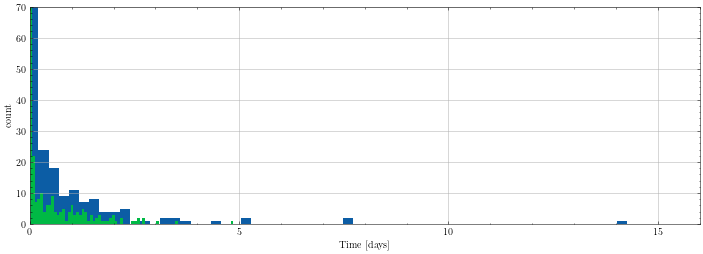

In [4]:

_=plt.hist(data.err_dense,bins=100)
_=plt.hist(data.err_conv,bins=100)
plt.ylabel(r'count')
# plt.ylim([0,2])
plt.xlabel(r'Time [days]')
plt.xlim([0,16])
plt.ylim([0,70])
plt.legend(markerscale=8)
# plt.yticks(np.arange(60,91,10))
plt.xticks(np.arange(0,16.1,5))

# plt.savefig('PV_dense_conv.png')

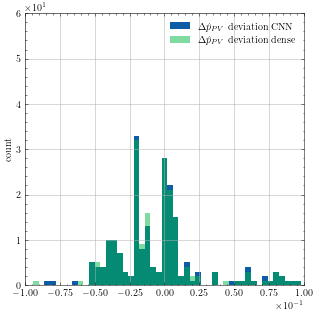

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

plt.style.use('science')

mpl.rcParams['figure.figsize'] = (5, 5)
mpl.rcParams['axes.grid'] = True
bound=2e0
bins=np.linspace(-bound,bound,1000)
plt.hist(data.err_conv,bins=bins,label=r'$\Delta \hat{p}_{PV}$ deviation CNN')
plt.hist(data.err_dense,bins=bins,label=r'$\Delta \hat{p}_{PV}$ deviation dense',alpha=0.5)
# plt.xlabel(r'$\Delta$SoC[\%]')
plt.ylim([0,6e1])
plt.ylabel(r'count')
plt.xlim([-1e-1,1e-1])
plt.legend(markerscale=8)
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
# plt.savefig('error_hist_bat.png')
plt.show()
# plt.yticks(np.arange(-2,2.1,1))


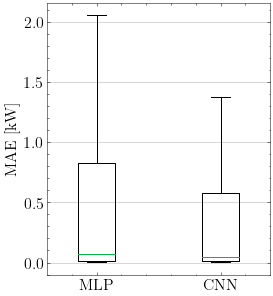

In [8]:
dt=1*60
plt.rcParams.update({'font.size': 16})
mpl.rcParams['lines.linewidth'] = 2    
plt.figure(figsize=(4,5))
data=get_data('s1data_dense_conv_2022_03_10_0321.csv',npy=False)
di=2*day
T=len(data)//dt
df=di+T
data=data[di:df].reset_index()
data['err_dense']=data.power_pv-data.PV_fc_dense
data['err_conv']=data.power_pv-data.PV_fc_conv
_=plt.boxplot(data.err_dense.abs().values,showfliers=False,labels=[r'MLP'],positions=[0])
_=plt.boxplot(data.err_conv.abs().values,showfliers=False,labels=[r'CNN'],positions=[0.5])
plt.grid(axis='x')

plt.ylabel('MAE [kW]')
plt.xlim([-0.2,0.7])
plt.savefig('PV_MAE_cnn_dense.pdf')